# **Text Pre-Processing**

In [ ]:
pip install Sastrawi

In [ ]:
pip install --upgrade openpyxl

In [ ]:
pip install --upgrade pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pyLDAvis

In [ ]:
pip install nltk

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import re
import nltk
import Sastrawi
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
print(pd.__version__)

1.3.1


In [ ]:
#Import Dataset
data = pd.read_excel('/content/drive/MyDrive/Project/Dataset.xlsx')
data

,Complaint,Sentiment,Problem
0,kedepanya dicek dulu lah ya sebelum ngirim ke ...,Negative,Conduct
1,oke tapi kumasukin kasus ini ke shitposting ya...,Negative,Conduct
2,hari ke belum ada penyelesaian nunggu lebaran ...,Negative,Conduct
3,tim kamu itu yg katanya mau konfirmasi lewat e...,Negative,Conduct
4,bakal sampe kapan saya nunggu nya,Negative,Conduct
...,...,...,...
1472,"tolong kalo balas satu masalah, jangan oper ke...",Negative,Sales Methods
1473,tolong kalau orang sudah bayar jgn di teror te...,Negative,Sales Methods
1474,"sudah saya baca,tapi alasan pembatalannya apa?...",Negative,Sales Methods
1475,setelah update kok tampilan i malah gak nyaman.,Negative,Sales Methods


In [ ]:
data['Sentiment'].value_counts()

Negative    769
Neutral     708
Name: Sentiment, dtype: int64

In [ ]:
data['Problem'].value_counts()

Post Purchase Phase       543
Purchase Phase            312
Conduct                   178
Purchase Phase Problem    161
Pre Purchase Phase        141
Privacy Problem            61
Evidence                   46
Sales Methods              29
Pre-Purchase Phase          6
Name: Problem, dtype: int64

In [ ]:
#Fixed Value
data = data.replace(to_replace='Pre-Purchase Phase',value='Pre Purchase Phase')
data = data.replace(to_replace='Purchase Phase Problem',value='Purchase Phase')

In [ ]:
data['Problem'].value_counts()

Post Purchase Phase    543
Purchase Phase         473
Conduct                178
Pre Purchase Phase     147
Privacy Problem         61
Evidence                46
Sales Methods           29
Name: Problem, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Complaint  1477 non-null   object
 1   Sentiment  1477 non-null   object
 2   Problem    1477 non-null   object
dtypes: object(3)
memory usage: 34.7+ KB


In [ ]:
#Return Data Type
data = data.convert_dtypes(infer_objects= False)

In [ ]:
data.info()

In [ ]:
data['Complaint'] = data['Complaint'].str.lower() # Case Folding

In [ ]:
#Punctuation Removal
def Punctuation(text) :
    text = text.str.replace(r'\-t',' ', regex=True)
    text = text.str.replace(r'[, ]+',' ', regex=True)
    text = text.str.replace(r'[^a-zA-Z\s]',' ', regex=True)
    text = text.str.replace(r'\n',' ', regex=True)
    text = text.str.replace(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)",' ', regex=True)
    return text

In [ ]:
indostopword = stopwords.words('indonesian')
indostopword

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
#Stopword removal Function
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in indostopword])

In [ ]:
#Initialize Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#Stemming Function
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
# def stem_word(text):
#     stem_text = [StemmerFactory().create_stemmer().stem(i) for i in text]
#     return stem_text

In [ ]:
#Implement Text Processing Function
data['Complaint'] = Punctuation(data['Complaint'])
data['Tokenized'] = data['Complaint'].apply(lambda x: word_tokenize(x))
data['stopword'] = data['Tokenized'].apply(lambda x :remove_stopwords(x))
data['text_stemmed'] = data['stopword'].apply(lambda text: stem_words(text))
data.head()

,Complaint,Sentiment,Problem,Tokenized,stopword,text_stemmed
0,kedepanya dicek dulu lah ya sebelum ngirim ke ...,Negative,Conduct,"[kedepanya, dicek, dulu, lah, ya, sebelum, ngi...","['kedepanya', 'dicek', 'dulu', 'lah', 'ya', 's...",depa cek dulu lah ya belum ngirim ke user ini ...
1,oke tapi kumasukin kasus ini ke shitposting ya...,Negative,Conduct,"[oke, tapi, kumasukin, kasus, ini, ke, shitpos...","['oke', 'tapi', 'kumasukin', 'kasus', 'ini', '...",oke tapi kumasukin kasus ini ke shitposting ya...
2,hari ke belum ada penyelesaian nunggu lebaran ...,Negative,Conduct,"[hari, ke, belum, ada, penyelesaian, nunggu, l...","['hari', 'ke', 'belum', 'ada', 'penyelesaian',...",hari ke belum ada selesai nunggu lebaran ya bang
3,tim kamu itu yg katanya mau konfirmasi lewat e...,Negative,Conduct,"[tim, kamu, itu, yg, katanya, mau, konfirmasi,...","['tim', 'kamu', 'itu', 'yg', 'katanya', 'mau',...",tim kamu itu yg kata mau konfirmasi lewat emai...
4,bakal sampe kapan saya nunggu nya,Negative,Conduct,"[bakal, sampe, kapan, saya, nunggu, nya]","['bakal', 'sampe', 'kapan', 'saya', 'nunggu', ...",bakal sampe kapan saya nunggu nya


In [ ]:
data.to_excel('/content/drive/MyDrive/Project/Hasil_preprocessing.xlsx')

# **MNB and SVC Implementation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
used = ['Problem','text_stemmed']
data_stemmed = pd.read_excel('/content/drive/MyDrive/Project/Hasil_preprocessing.xlsx',usecols=used)
data_stemmed

,Problem,text_stemmed
0,Conduct,depa cek dulu lah ya belum ngirim ke user ini ...
1,Conduct,oke tapi kumasukin kasus ini ke shitposting ya...
2,Conduct,hari ke belum ada selesai nunggu lebaran ya bang
3,Conduct,tim kamu itu yg kata mau konfirmasi lewat emai...
4,Conduct,bakal sampe kapan saya nunggu nya
...,...,...
1472,Sales Methods,tolong kalo balas satu masalah jangan oper ke ...
1473,Sales Methods,tolong kalau orang sudah bayar jgn di teror te...
1474,Sales Methods,sudah saya baca tapi alas batal apa sy tanya k...
1475,Sales Methods,telah update kok tampil i malah gak nyaman


In [ ]:
# #Menggabungkan Kolom Sentiment dan Problem Menjadi Label
# data_stemmed['Label'] = data_stemmed['Sentiment']+'-'+data_stemmed['Problem']

In [ ]:
data_stemmed

,Problem,text_stemmed
0,Conduct,depa cek dulu lah ya belum ngirim ke user ini ...
1,Conduct,oke tapi kumasukin kasus ini ke shitposting ya...
2,Conduct,hari ke belum ada selesai nunggu lebaran ya bang
3,Conduct,tim kamu itu yg kata mau konfirmasi lewat emai...
4,Conduct,bakal sampe kapan saya nunggu nya
...,...,...
1472,Sales Methods,tolong kalo balas satu masalah jangan oper ke ...
1473,Sales Methods,tolong kalau orang sudah bayar jgn di teror te...
1474,Sales Methods,sudah saya baca tapi alas batal apa sy tanya k...
1475,Sales Methods,telah update kok tampil i malah gak nyaman


In [ ]:
#Count Label
data_stemmed['Problem'].value_counts()

Post Purchase Phase    543
Purchase Phase         473
Conduct                178
Pre Purchase Phase     147
Privacy Problem         61
Evidence                46
Sales Methods           29
Name: Problem, dtype: int64

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Set Attribute and Target
x = data_stemmed['text_stemmed'].values
y = data_stemmed['Problem'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Transform Label
LE = LabelEncoder()
y_le = LE.fit_transform(y)

In [ ]:
tfidf = TfidfVectorizer() #initialize tfidf vectorizer
x_tf = tfidf.fit_transform(x).toarray() #transform tfidf

In [ ]:
tfidf.vocabulary_

{'depa': 410,
 'cek': 307,
 'dulu': 506,
 'lah': 996,
 'ya': 2081,
 'belum': 177,
 'ngirim': 1299,
 'ke': 872,
 'user': 2030,
 'ini': 732,
 'code': 341,
 'dan': 377,
 'masih': 1133,
 'muncul': 1224,
 'tidak': 1917,
 'indikasi': 721,
 'oke': 1362,
 'tapi': 1856,
 'kumasukin': 979,
 'kasus': 866,
 'shitposting': 1719,
 'biar': 197,
 'ga': 576,
 'ada': 8,
 'lagi': 995,
 'korban': 958,
 'tipu': 1931,
 'hari': 664,
 'selesai': 1677,
 'nunggu': 1334,
 'lebaran': 1024,
 'bang': 131,
 'tim': 1922,
 'kamu': 847,
 'itu': 756,
 'yg': 2093,
 'kata': 867,
 'mau': 1143,
 'konfirmasi': 949,
 'lewat': 1034,
 'email': 519,
 'kabar': 819,
 'saya': 1637,
 'tanya': 1854,
 'udah': 2004,
 'respon': 1582,
 'pikir': 1479,
 'kenapa': 897,
 'ribut': 1596,
 'di': 423,
 'sosmed': 1776,
 'sekarang': 1667,
 'jawab': 780,
 'sampe': 1629,
 'kapan': 852,
 'suruh': 1823,
 'bakal': 120,
 'nya': 1338,
 'padahal': 1393,
 'jelas': 787,
 'perihal': 1456,
 'komplain': 943,
 'yang': 2090,
 'kemarin': 889,
 'sampai': 1628,
 't

In [ ]:
#Oversampling
oversample = SMOTE()
# fit and apply metode oversampling
x_over, y_over = oversample.fit_resample(x_tf, y_le)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
#Print before oversampling and result Oversampling
print(Counter(y))
print(Counter(y_over))

Counter({'Post Purchase Phase': 543, 'Purchase Phase': 473, 'Conduct': 178, 'Pre Purchase Phase': 147, 'Privacy Problem': 61, 'Evidence': 46, 'Sales Methods': 29})
Counter({0: 543, 1: 543, 2: 543, 3: 543, 4: 543, 5: 543, 6: 543})


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


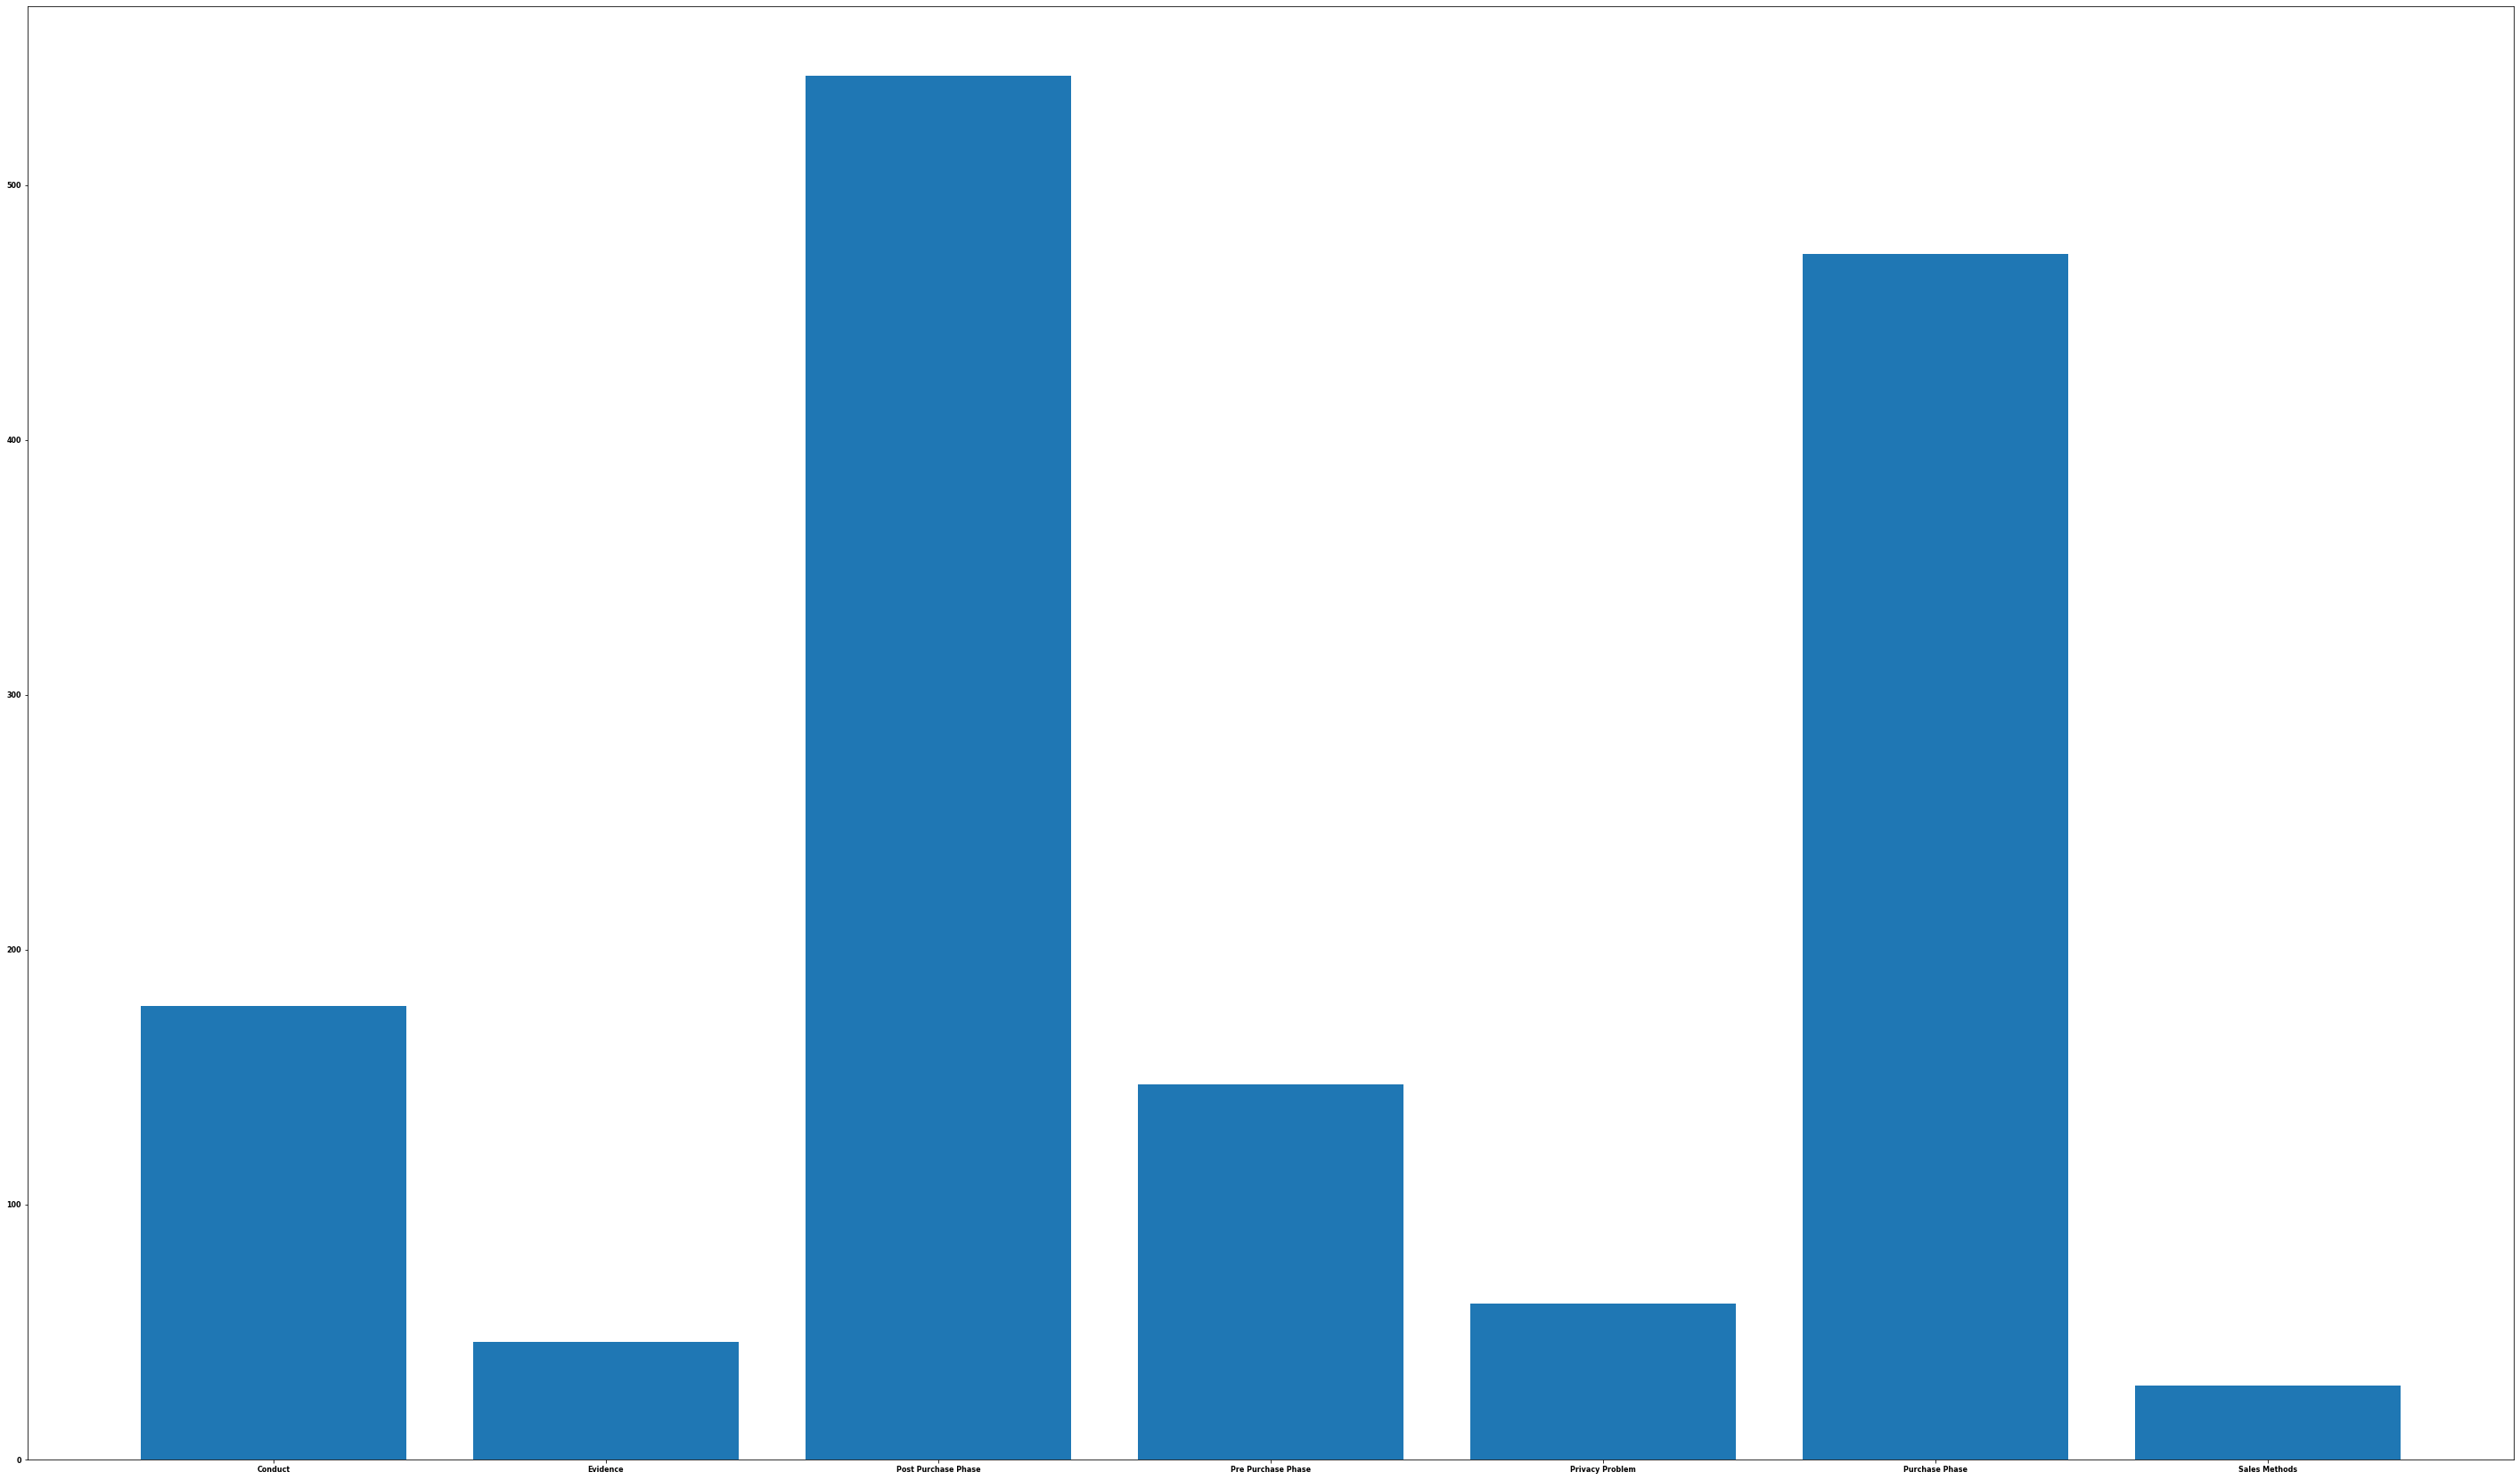

In [ ]:
#Visualize dataset Before oversample
import collections
import matplotlib.pyplot as plt
import seaborn as sns
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

plt.rc('font', **font)
w = collections.Counter(y)
plt.figure(figsize=(50,30))
plt.bar(w.keys(), w.values())
plt.savefig("/content/drive/MyDrive/sebelum.png")
plt.show()

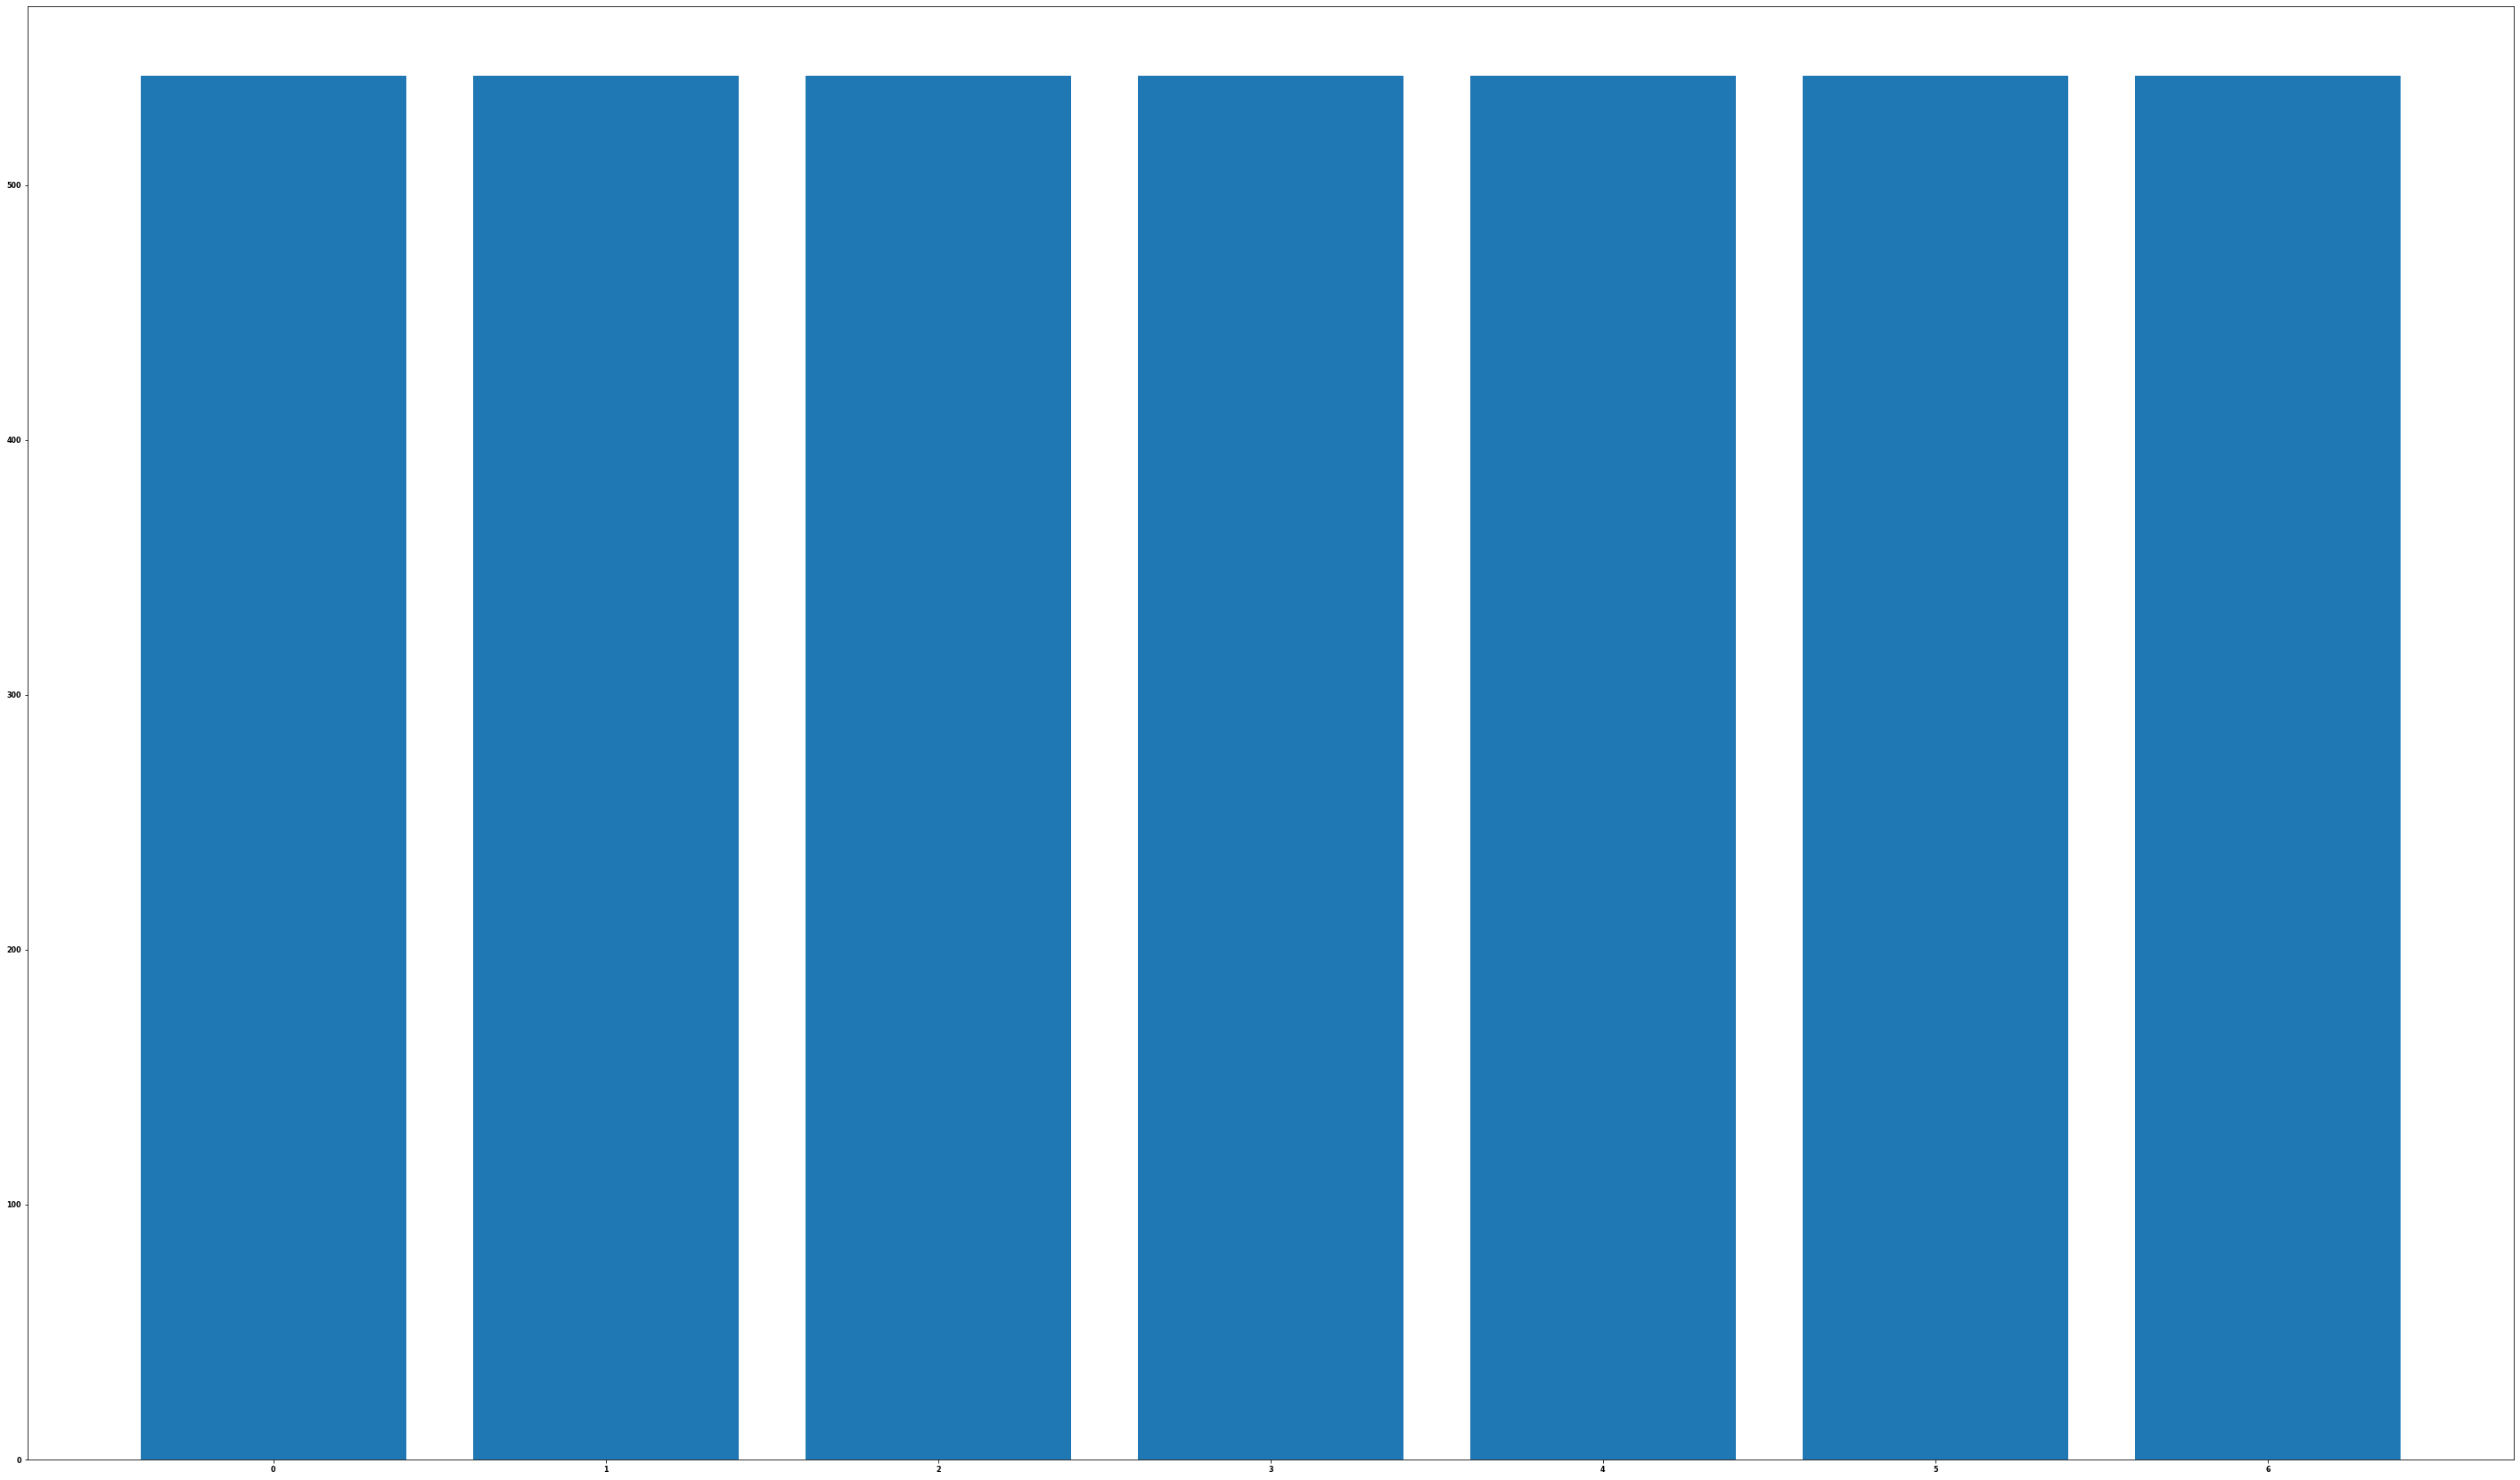

In [ ]:
#Visualize dataset After oversample
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

plt.rc('font', **font)
w = collections.Counter(y_over)
plt.figure(figsize=(50,30))
plt.bar(w.keys(), w.values())
plt.savefig("/content/drive/MyDrive/sesudah.png")
plt.show()

In [ ]:
#Split dataset into data training dan testing
xtrain,xtest,ytrain,ytest = train_test_split(x_over,y_over, test_size = 0.3)

In [ ]:
xtrain.shape

(2660, 2095)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
#Create pipeline with tfidf transformer and MNB
pipeline = Pipeline([  
    ('tfidf', TfidfTransformer()),  
    ('classifier', naive_bayes.MultinomialNB()),  
])

In [ ]:
#Training
pipeline.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
#Create model with tfidf transformer and SVC
pipeline2 = Pipeline([
                     ('tfidf', TfidfTransformer()),
                     ('classifier', SVC()),
                     ])

In [ ]:
pipeline2.fit(xtrain,ytrain) #Train

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
#Test Predict MNB
predict = pipeline.predict(xtest)

In [ ]:
#Test Predict SVC
predict2 = pipeline2.predict(xtest)

In [ ]:
#Calculate MNB Accuracy
from sklearn.metrics import accuracy_score
print('Model Naive Bayes accuracy score: {0:0.4f}'. format(accuracy_score(ytest, predict)))

Model Naive Bayes accuracy score: 0.9036


In [ ]:
#Calculate SVC Accuracy
from sklearn.metrics import accuracy_score
print('Model SVM accuracy score: {0:0.4f}'. format(accuracy_score(ytest, predict2)))

Model SVM accuracy score: 0.9430


# LDA Implementation

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

In [ ]:
#Function to Print Topic
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [ ]:
#Create object LDA
lda = LDA(n_components=7)

In [ ]:
#Train Model LDA
lda.fit(x_over)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Topics found via LDA:")
print_topics(lda, tfidf, 20) #Print Topic Result

Topics found via LDA:

Topic #0:
saya tapi sudah bisa ada belum ini tidak bayar itu yg sekarang nya lalu log masuk ulas saldo ga ya

Topic #1:
dm sudah saya di tolong min cek ya nomor belum untuk transaksi dana bantu kirim mohon kembali tapi terimakasih terima

Topic #2:
saya ada susah ya potong ini min kok laku udah kan bgt di kenapa mau padahal voucher produk complain lewat

Topic #3:
akun tampil saya retas di kok ada ya ini shopee min telah nyaman yang tidak jadi bisa buka sama email

Topic #4:
saya nya bisa ga invoice shopee kok hp min gak jawab ya kak kirim lampir di ini app dan sama

Topic #5:
error shopee bisa ya lagi gak tanya mau barang saya kok kaga seller siang di kayak deh dong promo buka

Topic #6:
toko tipu saya bisa ada min ini korban gak tidak yang banyak produk kalian baik kenapa guna ya sistem yak


In [ ]:
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda
import pickle

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
#Get LDA Result
dtm = np.matrix(x_over)
LDAvis_visualized = sklearn_lda.prepare(lda, dtm, tfidf)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
LDAvis_visualized

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.122784  0.012848       1        1  19.790810
4      0.041889 -0.044201       2        1  15.939127
5     -0.164563  0.001785       3        1  14.483008
3     -0.021520 -0.147314       4        1  14.326697
0      0.071442  0.016913       5        1  13.444500
2     -0.018455  0.094550       6        1  11.320632
6     -0.031578  0.065419       7        1  10.695227, topic_info=           Term       Freq       Total Category  logprob  loglift
533       error  53.000000   53.000000  Default  30.0000  30.0000
39         akun  93.000000   93.000000  Default  29.0000  29.0000
486          dm  91.000000   91.000000  Default  28.0000  28.0000
1941       toko  40.000000   40.000000  Default  27.0000  27.0000
1842     tampil  31.000000   31.000000  Default  26.0000  26.0000
...         ...        ...         ...      ...      ...      ...
2081     

In [ ]:
pyLDAvis.save_html(LDAvis_visualized,'/content/drive/MyDrive/Project/Hasil_LDA.html') #Export LDA result

# **Evaluation Naive Bayes**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#K-fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
Score = cross_val_score(pipeline, x_over, y_over, cv=cv, scoring='accuracy')

In [ ]:
Score

array([0.87401575, 0.91052632, 0.88421053, 0.89210526, 0.91842105,
       0.90789474, 0.91578947, 0.90263158, 0.91052632, 0.91842105])

In [ ]:
#Average K-n Score
print(np.mean(Score))

0.903454206382097


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


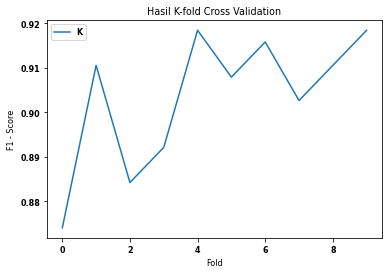

In [ ]:
#Visualize K-fold Performance
import matplotlib.pyplot as plt
plt.plot(Score)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

plt.rc('font', **font)
plt.title('Hasil K-fold Cross Validation')
plt.ylabel('F1 - Score')
plt.xlabel('Fold')
plt.legend('K-n', loc='upper left')
plt.savefig("/content/drive/MyDrive/k-fold.png")
plt.show()

In [ ]:
#Show Confusion Matrix, Precision, Recall and f1-score MNB
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest,predict))
print(classification_report(ytest,predict))

[[154   3   3   3   0   2   1]
 [  0 167   0   0   0   0   0]
 [  8   4 116   6   7  14   2]
 [  3   0   1 156   1   3   1]
 [  0   0   0   0 162   0   0]
 [  5   4  24   5   5 117   4]
 [  0   1   0   0   0   0 159]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       166
           1       0.93      1.00      0.97       167
           2       0.81      0.74      0.77       157
           3       0.92      0.95      0.93       165
           4       0.93      1.00      0.96       162
           5       0.86      0.71      0.78       164
           6       0.95      0.99      0.97       160

    accuracy                           0.90      1141
   macro avg       0.90      0.90      0.90      1141
weighted avg       0.90      0.90      0.90      1141



In [ ]:
#Show Confusion Matrix, Precision, Recall and f1-score SVC
print(confusion_matrix(ytest,predict2))
print(classification_report(ytest,predict2))

[[159   0   4   0   0   3   0]
 [  0 167   0   0   0   0   0]
 [  2   0 137   1   0  17   0]
 [  2   0   2 158   0   3   0]
 [  0   0   0   0 162   0   0]
 [  0   0  31   0   0 133   0]
 [  0   0   0   0   0   0 160]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       166
           1       1.00      1.00      1.00       167
           2       0.79      0.87      0.83       157
           3       0.99      0.96      0.98       165
           4       1.00      1.00      1.00       162
           5       0.85      0.81      0.83       164
           6       1.00      1.00      1.00       160

    accuracy                           0.94      1141
   macro avg       0.94      0.94      0.94      1141
weighted avg       0.95      0.94      0.94      1141



In [ ]:
conduct = data_stemmed[data_stemmed['Problem']=='Conduct']
sm = data_stemmed[data_stemmed['Problem']=='Sales Methods']

from collections import Counter
cnt = Counter()
for text in conduct.text_stemmed.values:
    for word in text.split():
        cnt[word] += 1
#Print Commmon Word on conduct        
conduct_most = cnt.most_common(9)
dconduct = pd.DataFrame(conduct_most)
dconduct = dconduct.iloc[0:,:]
dconduct.columns = ['Common_words','count']
dconduct.style.background_gradient(cmap='Greens')

,Common_words,count
0,saya,88
1,di,53
2,ada,48
3,tipu,43
4,ini,34
5,ga,32
6,ya,29
7,yg,28
8,sudah,27


([<matplotlib.axis.YTick at 0x7f8e574e8dd0>,
 [Text(0, 0, 'saya'),
  Text(0, 0, 'di'),
  Text(0, 0, 'ada'),
  Text(0, 0, 'tipu'),
  Text(0, 0, 'ini'),
  Text(0, 0, 'ga'),
  Text(0, 0, 'ya'),
  Text(0, 0, 'yg'),
  Text(0, 0, 'sudah')])

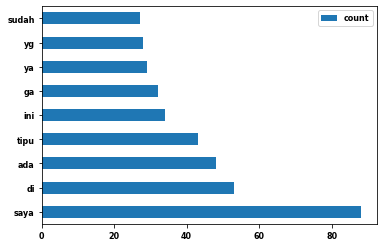

In [ ]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
#Visualize Most common word on Conduct Label
dconduct.plot(kind ='barh')
plt.yticks(range(0,9), dconduct['Common_words'])

In [ ]:
from collections import Counter
cnt = Counter()
for text in sm.text_stemmed.values:
    for word in text.split():
        cnt[word] += 1
#Count most common word on Sales Method      
sm_most = cnt.most_common(9)
dsm = pd.DataFrame(sm_most)
dsm = dsm.iloc[0:,:]
dsm.columns = ['Common_words','count']
dsm.style.background_gradient(cmap='Greens')

,Common_words,count
0,ya,9
1,saya,8
2,error,7
3,gak,6
4,kok,6
5,di,5
6,ada,5
7,shopee,5
8,min,5


([<matplotlib.axis.YTick at 0x7f8e573fb8d0>,
 [Text(0, 0, 'ya'),
  Text(0, 0, 'saya'),
  Text(0, 0, 'error'),
  Text(0, 0, 'gak'),
  Text(0, 0, 'kok'),
  Text(0, 0, 'di'),
  Text(0, 0, 'ada'),
  Text(0, 0, 'shopee'),
  Text(0, 0, 'min')])

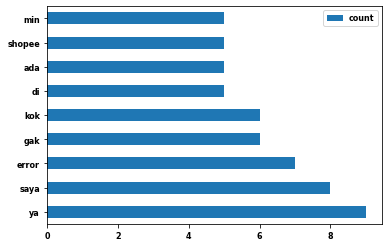

In [ ]:
#Visualize Most Common Word on Sales Method
dsm.plot(kind ='barh') 
plt.yticks(range(0,9), dsm['Common_words'])
# plt.savefig()